<a href="https://colab.research.google.com/github/Harshitha-Lingala/Skin-Cancer-Lesions-Classification/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Augementation using ImageDataGenerator

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import storage
storage_client = storage.Client()

In [ ]:
import pandas as pd
from PIL import Image
import io
import numpy as np
import cv2

In [ ]:
bucket = storage_client.get_bucket('ham10000dataset')
blob_metadata = bucket.blob('HAM10000_metadata_cleaned.csv')
local_cleaned_metadata_location = '/tmp/HAM10000_metadata.csv'
blob_metadata.download_to_filename(local_cleaned_metadata_location)


In [ ]:
df_metadata = pd.read_csv(local_cleaned_metadata_location)

Initializing ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_generator = ImageDataGenerator (
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False    # randomly flip images
        )

In [ ]:
images_blobs = bucket.list_blobs(prefix='HAM10000_images_clean/')

In [ ]:
images_files = [blob.name for blob in images_blobs]


Augmenting data for 1 image and generating 1 augmented image

In [ ]:
image_blob = bucket.blob(images_files[0])
image_bytes = image_blob.download_as_bytes()
#convert image bytes to np array
image_array = np.frombuffer(image_bytes, np.uint8)
# decode the image to cv2
image_cv2 = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

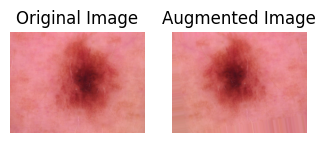

In [ ]:
import matplotlib.pyplot as plt

#making 3D - 4D
image_batch = np.expand_dims(image_cv2, axis=0)

# Generate augmented images (Here, just generating one sample for demonstration)
aug_iter = data_generator.flow(image_batch, batch_size=1)

# Get the first batch of the augmented images
aug_img_batch = next(aug_iter)

# Retrieve the image from the batch and convert from BGR to RGB (since cv2 - matplotlb)
aug_img = cv2.cvtColor(aug_img_batch[0].astype('uint8'), cv2.COLOR_BGR2RGB)

# Display the original and augmented image using matplotlib
plt.figure(figsize=(8, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(aug_img)
plt.title('Augmented Image')
plt.axis('off')

plt.show()

Generating three augmented images of the same one image

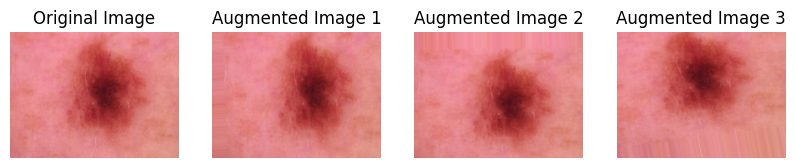

In [ ]:
#making 3D - 4D
image_batch = np.expand_dims(image_cv2, axis=0)

# Generate augmented images
aug_iter = data_generator.flow(image_batch, batch_size=3)

# Display the original and augmented images using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# iterate the augmented images iterator by .next() method to get the next augmented image
aug_img_batch = next(aug_iter)

# Retrieve the image from the batch and convert from BGR to RGB
aug_img = cv2.cvtColor(aug_img_batch[0].astype('uint8'), cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 2)
plt.imshow(aug_img)
plt.title('Augmented Image 1')
plt.axis('off')

# iterate the augmented images iterator by .next() method to get the next augmented image
aug_img_batch = next(aug_iter)

# Retrieve the image from the batch and convert from BGR to RGB
aug_img = cv2.cvtColor(aug_img_batch[0].astype('uint8'), cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 3)
plt.imshow(aug_img)
plt.title('Augmented Image 2')
plt.axis('off')

# iterate the augmented images iterator by .next() method to get the next augmented image
aug_img_batch = next(aug_iter)

# Retrieve the image from the batch and convert from BGR to RGB
aug_img = cv2.cvtColor(aug_img_batch[0].astype('uint8'), cv2.COLOR_BGR2RGB)
plt.subplot(1, 4, 4)
plt.imshow(aug_img)
plt.title('Augmented Image 3')
plt.axis('off')

plt.show()

We need the augmented images for training and
as a best practice we call the imagedtagenerator directly in the flow of the training model.fit_train() pipeline

In [ ]:
df_metadata.groupby('skin_cancer_type').count()

,lesion_id,image_id,dx_type,age,sex,localization,image_path,clean_image_path
skin_cancer_type,,,,,,,,
0,327,327,327,327,327,327,327,327
1,514,514,514,514,514,514,514,514
2,1099,1099,1099,1099,1099,1099,1099,1099
3,115,115,115,115,115,115,115,115
4,1113,1113,1113,1113,1113,1113,1113,1113
5,6705,6705,6705,6705,6705,6705,6705,6705
6,142,142,142,142,142,142,142,142
